In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import pywt
import soundfile as sf
plt.rcParams['text.usetex'] = True


In [2]:

# 바이올린과 피아노 샘플 로드
violin_audio, sr = librosa.load(librosa.example('trumpet'), sr=None, duration=5.0)
piano_audio, sr = librosa.load(librosa.example('brahms'), sr=None, duration=5.0)
# 파일로 저장
sf.write('./violin_sample.wav', violin_audio, sr)
sf.write('./piano_sample.wav', piano_audio, sr)


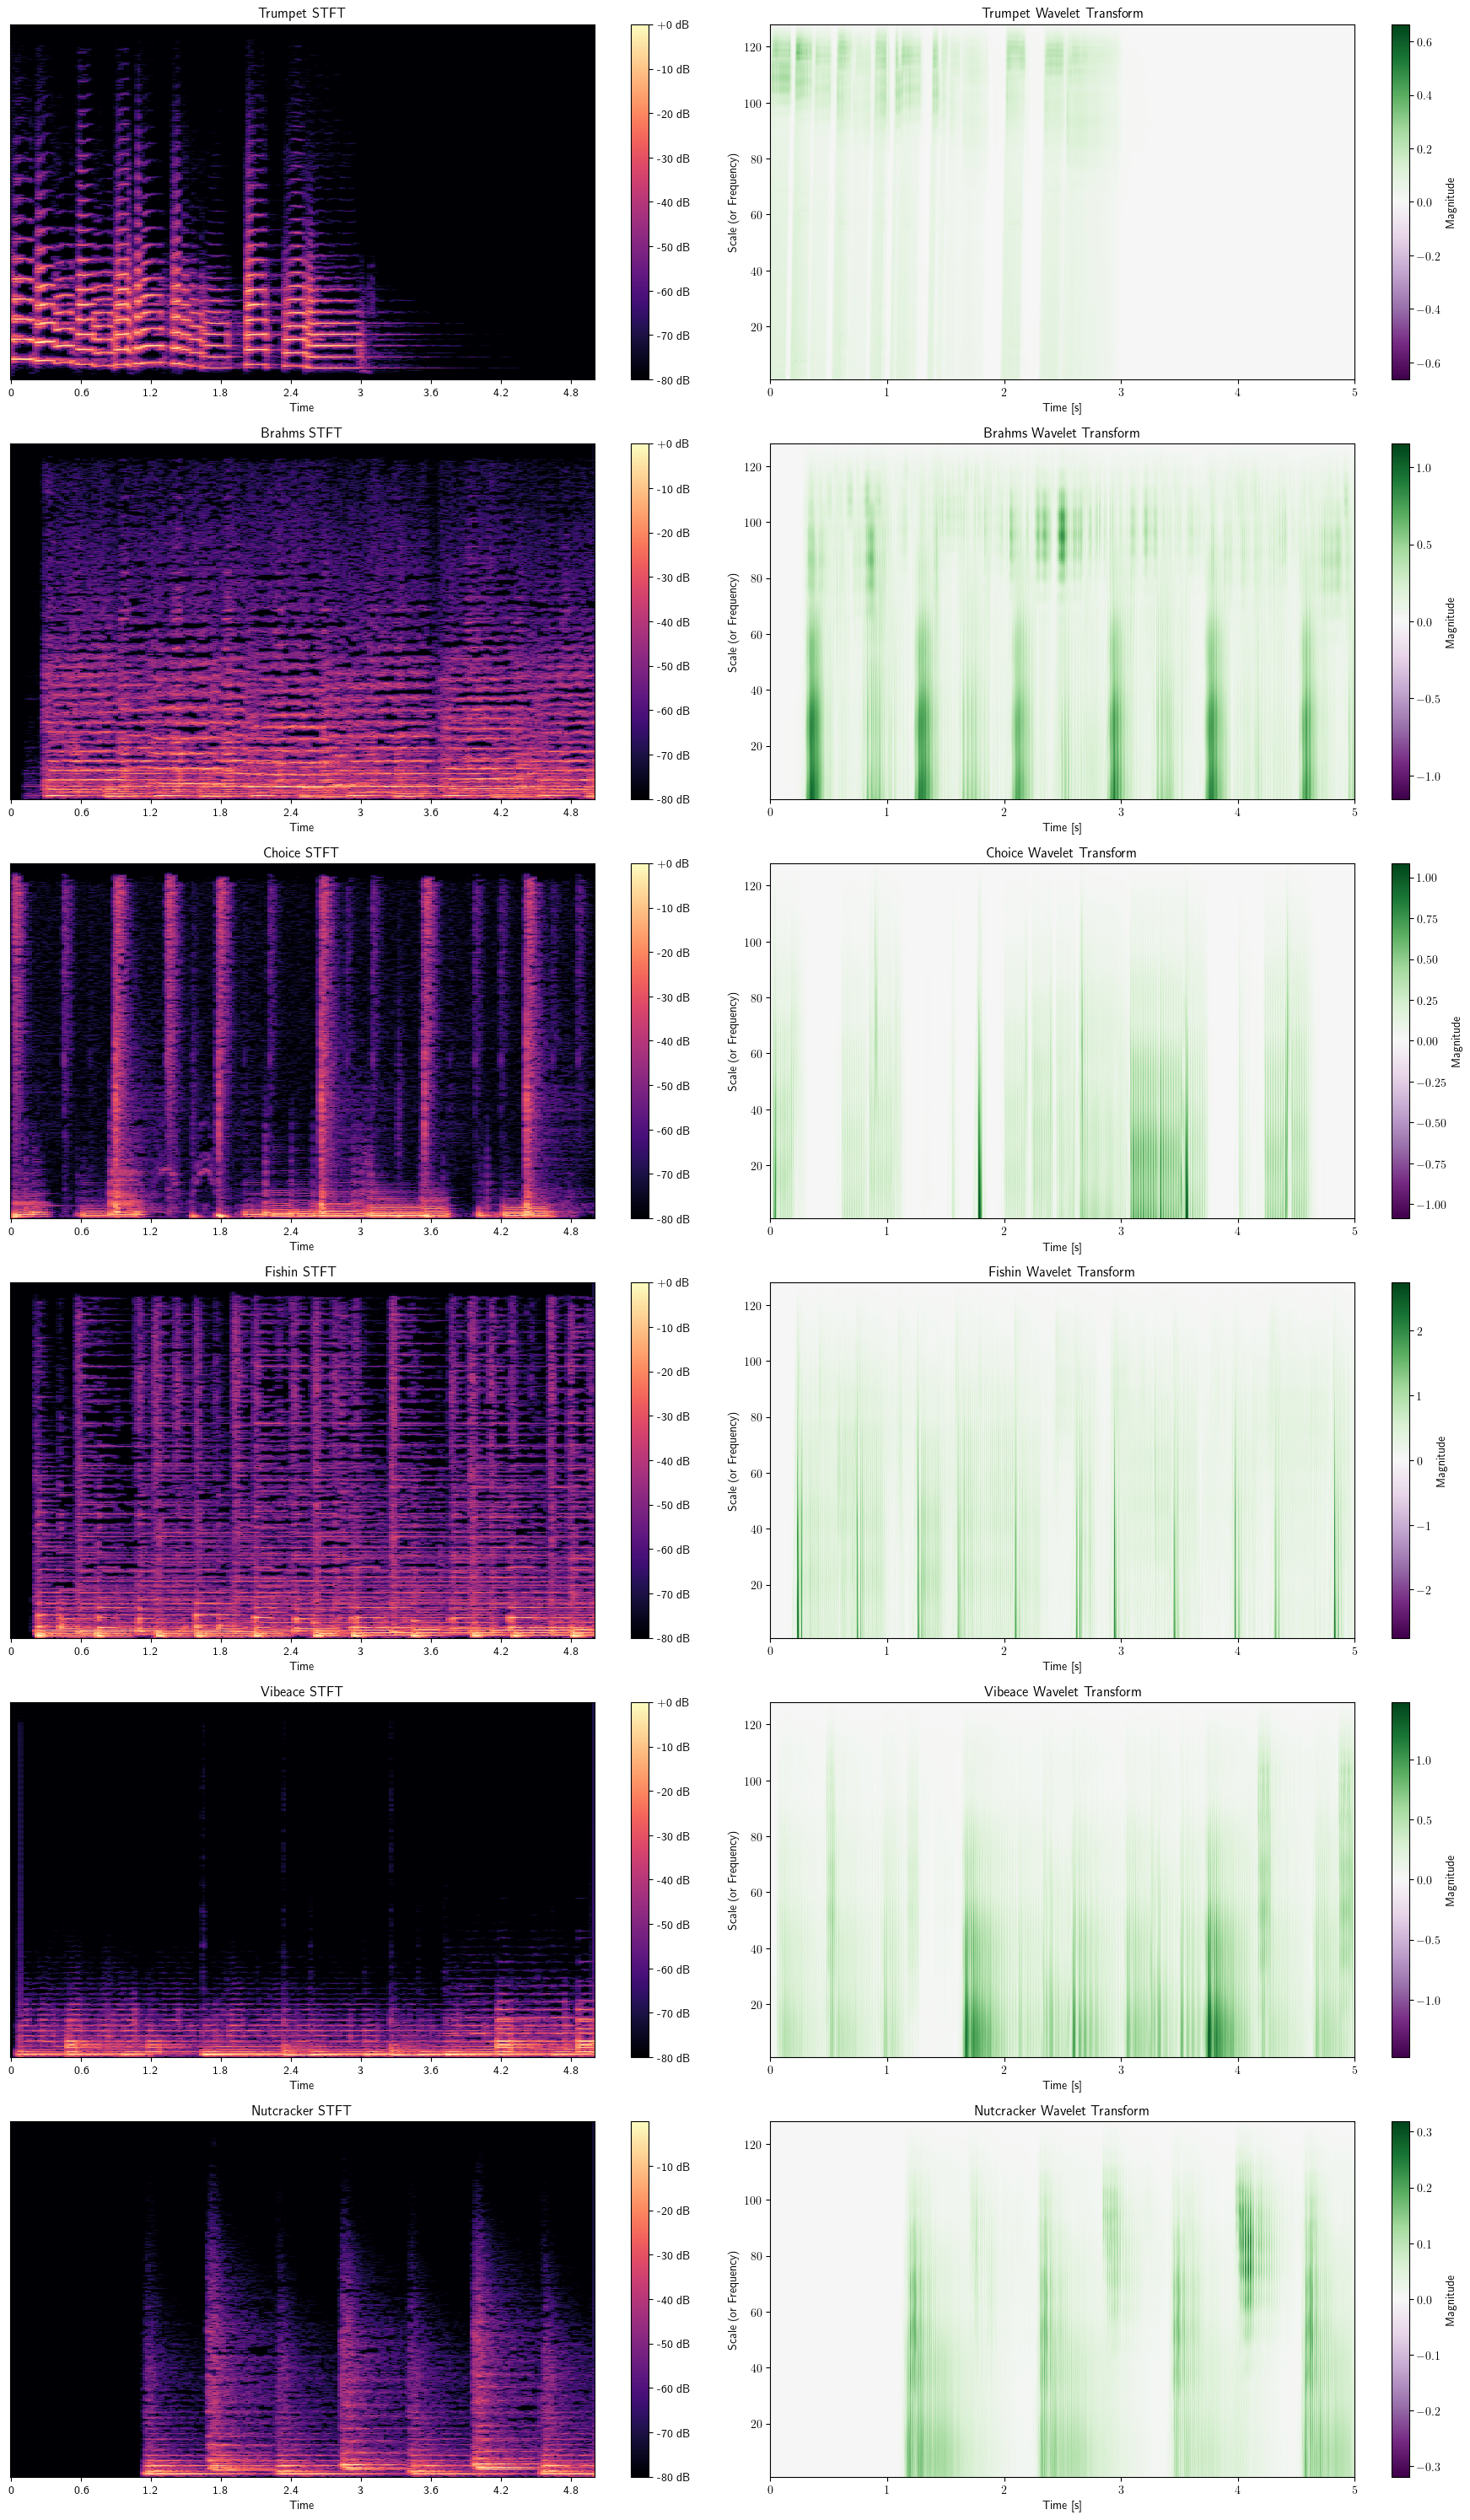

In [5]:
# 샘플레이트 설정
sr = 22050
duration = 5 
# 오디오 파일 로드
trumpet_audio, sr = librosa.load(librosa.ex('trumpet'), sr=sr, duration=5.0)
brahms_audio, sr = librosa.load(librosa.ex('brahms'), sr=sr, duration=5.0)
choice_audio, sr = librosa.load(librosa.ex('choice'), sr=sr, duration=5.0)
fishin_audio, sr = librosa.load(librosa.ex('fishin'), sr=sr, duration=5.0)
vibeace_audio, sr = librosa.load(librosa.ex('vibeace'), sr=sr, duration=5.0)
nutcracker_audio, sr = librosa.load(librosa.ex('nutcracker'), sr=sr, duration=5.0)


# 오디오 신호 리스트
signals = {
    'Trumpet': trumpet_audio,
    'Brahms': brahms_audio,
    'Choice': choice_audio,
    'Fishin': fishin_audio,
    'Vibeace': vibeace_audio,
    'Nutcracker': nutcracker_audio
}

# STFT와 CWT 수행 및 시각화
plt.figure(figsize=(18, 30))

for i, (title, audio) in enumerate(signals.items()):
    # STFT 수행
    stft = librosa.stft(audio)
    stft_db = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
    
    # CWT 수행
    widths = np.arange(1, 128)
    cwtmatr, freqs = pywt.cwt(audio, widths, 'cmor', sampling_period=1/sr)
    
    # STFT 시각화
    plt.subplot(len(signals), 2, 2 * i + 1)
    librosa.display.specshow(stft_db, sr=sr, x_axis='time')
    plt.title(f'{title} STFT')
    plt.colorbar(format='%+2.0f dB')
    
    # CWT 시각화
    plt.subplot(len(signals), 2, 2 * i + 2)
    plt.imshow(np.abs(cwtmatr), extent=[0, duration, 1, 128], cmap='PRGn', aspect='auto', vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
    plt.title(f'{title} Wavelet Transform')
    plt.xlabel("Time [s]")
    plt.ylabel("Scale (or Frequency)")
    plt.colorbar(label='Magnitude')

plt.tight_layout()
plt.show()

이 그림은 librosa` 패키지를 이용하여 다양한 신호를 분석한 결과를 보여줍니다. 각 신호는 고유한 특징을 가지고 있습니다. 트럼펫 소리는 명확한 조화 구조를 가지고 있으며, 이는 주기적인 성분들이 시간 축에서 반복적으로 나타나는 패턴을 의미합니다. 브람스 음악은 다양한 악기의 복잡한 주파수 성분을 특징으로 합니다. 피아노 소리(Choice)는 명확한 주파수 성분과 배음이 있으며, 음의 변화가 뚜렷합니다. 바이올린 연주(Fishin)는 고주파수 성분이 두드러지며, 세밀한 음의 변화가 특징입니다. 비브라폰 연주(Vibeace)는 다양한 주파수 성분이 복합적으로 나타나며, 넛크래커 음악(Nutcracker)은 여러 악기의 복잡한 주파수 분포와 동적 변화를 특징으로 합니다.

STFT(Short-Time Fourier Transform)은 고정된 크기의 윈도우를 사용하여 일정한 시간-주파수 해상도를 가집니다. 이는 주기적이고 조화적인 성분, 즉 주파수와 배음들이 반복적으로 나타나는 패턴을 잘 포착합니다. 트럼펫 소리에서 이러한 조화 구조가 명확히 드러나며, 브람스 음악에서는 연속적인 주파수 분포를 관찰할 수 있습니다. 피아노 소리의 주파수 성분도 잘 분리되어 나타나고, 바이올린 연주의 고주파수 성분이 명확하게 보입니다. 비브라폰 연주에서는 조화 구조가 뚜렷하며, 넛크래커 음악은 복잡한 주파수 분포를 보여줍니다.

반면, CWT(Continuous Wavelet Transform)는 웨이블릿 기저를 사용하여 다양한 시간과 주파수 스케일에서 신호를 분석합니다. 이는 시간-주파수 해상도가 높아 급격한 주파수 변화를 더 세밀하게 포착할 수 있습니다. 트럼펫 소리의 시간-주파수 변화를 더 세밀하게 포착하고, 브람스 음악의 다양한 주파수 성분을 더 명확히 드러냅니다. 피아노 음의 세밀한 변화를 잘 포착하며, 바이올린 소리의 시간-주파수 변화를 세밀하게 나타냅니다. 비브라폰 소리의 다양한 주파수 성분이 명확하게 드러나고, 넛크래커 음악의 동적 변화를 더 잘 포착합니다.

이처럼, STFT는 일정한 시간-주파수 해상도로 조화 구조를 잘 보여주지만, 급격한 변화 포착에는 한계가 있습니다. 반면, CWT는 다양한 주파수 성분을 세밀하게 분석할 수 있어, 특히 빠르게 변하는 주파수를 가진 신호 분석에 유용합니다. 이 비교를 통해 CWT의 우수성을 확인할 수 있습니다.



This image shows the results of analyzing various signals using the `librosa` package. Each signal has unique characteristics. The trumpet sound has clear harmonic structures, meaning periodic components repeat over time. Brahms' music features complex frequency components from multiple instruments. The piano sound (Choice) has distinct frequency components and harmonics with clear changes in tone. Violin performance (Fishin) is characterized by prominent high-frequency components and fine tonal changes. Vibraphone performance (Vibeace) exhibits complex frequency components, while Nutcracker music (Nutcracker) features complex frequency distributions and dynamic changes from various instruments.

STFT (Short-Time Fourier Transform) uses fixed-size windows, providing a consistent time-frequency resolution, effectively capturing periodic and harmonic components, such as in the trumpet sound, where these structures are clear. Brahms' music shows continuous frequency distributions, and the piano sound's frequency components are well-separated. Violin performance shows clear high-frequency components, and vibraphone performance reveals distinct harmonic structures, with Nutcracker music demonstrating complex frequency distributions.

In contrast, CWT (Continuous Wavelet Transform) uses wavelet bases to analyze signals across various time and frequency scales. This results in higher time-frequency resolution, capturing rapid frequency changes more precisely. The trumpet sound's time-frequency changes are detailed, and Brahms' music's diverse frequency components are more evident. The piano sound's fine tonal changes are well captured, and the violin sound's time-frequency changes are clearly shown. Vibraphone sound's diverse frequency components are distinct, and Nutcracker music's dynamic changes are better captured.

Thus, STFT effectively shows harmonic structures with consistent resolution but has limitations in capturing rapid changes. Conversely, CWT provides detailed analysis of various frequency components, especially for signals with rapid frequency changes, demonstrating its superiority.